In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input,BatchNormalization,Activation

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test  =  x_train/255.0,x_test/255.0

In [3]:
def inception_conv(filter,size,input_shape):
    x_1 = Conv2D(filters=filter, kernel_size=size, padding='same')(input_shape)
    x_1 = BatchNormalization()(x_1)
    x_1 = Activation(activation='relu')(x_1)
    return x_1

def inception_module(input_shape):
     
    tower_1 = inception_conv(6,(1,1),input_shape)
    
    tower_2 = inception_conv(6,(1,1),input_shape)
    tower_2 = inception_conv(6,(3,3),tower_2)
    
    tower_3 = inception_conv(6,(1,1),input_shape)
    tower_3 = inception_conv(6,(5,5),tower_3)
    
    tower_4 = MaxPooling2D((3,3),strides=1,padding='same')(input_shape)
    tower_4 = inception_conv(6,(1,1),tower_4)
    
    output = tf.keras.layers.concatenate([tower_1, tower_2, tower_3,tower_4], axis=1)
    
    return output




In [4]:
input_shape = Input(shape=(32, 32, 3))

In [5]:
one_layer = inception_conv(6,(1,1),input_shape)

In [6]:
inception_block0_0 = inception_module(one_layer)

In [7]:
inception_block0_1 = inception_module(inception_block0_0)

In [8]:
inception_block1_0 = inception_module(inception_block0_1)

In [9]:
inception_block1_1 = inception_module(inception_block1_0)

In [10]:
flatton_layer = tf.keras.layers.GlobalAveragePooling2D()(inception_block1_1)

In [11]:
output = tf.keras.layers.Dense(10,activation='softmax')(flatton_layer)

In [12]:
model = tf.keras.models.Model(inputs=input_shape,outputs=output)

In [13]:
model.compile(optimizer='adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['acc'])

In [15]:
history = model.fit(x_train,y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data = (x_test,y_test),
                    validation_freq=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
 9824/50000 [====>.........................] - ETA: 6:54 - loss: 2.2655 - acc: 0.1297

KeyboardInterrupt: 

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 6)    24          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 6)    24          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 6)    0           batch_normalization[0][0]        
______________________________________________________________________________________________

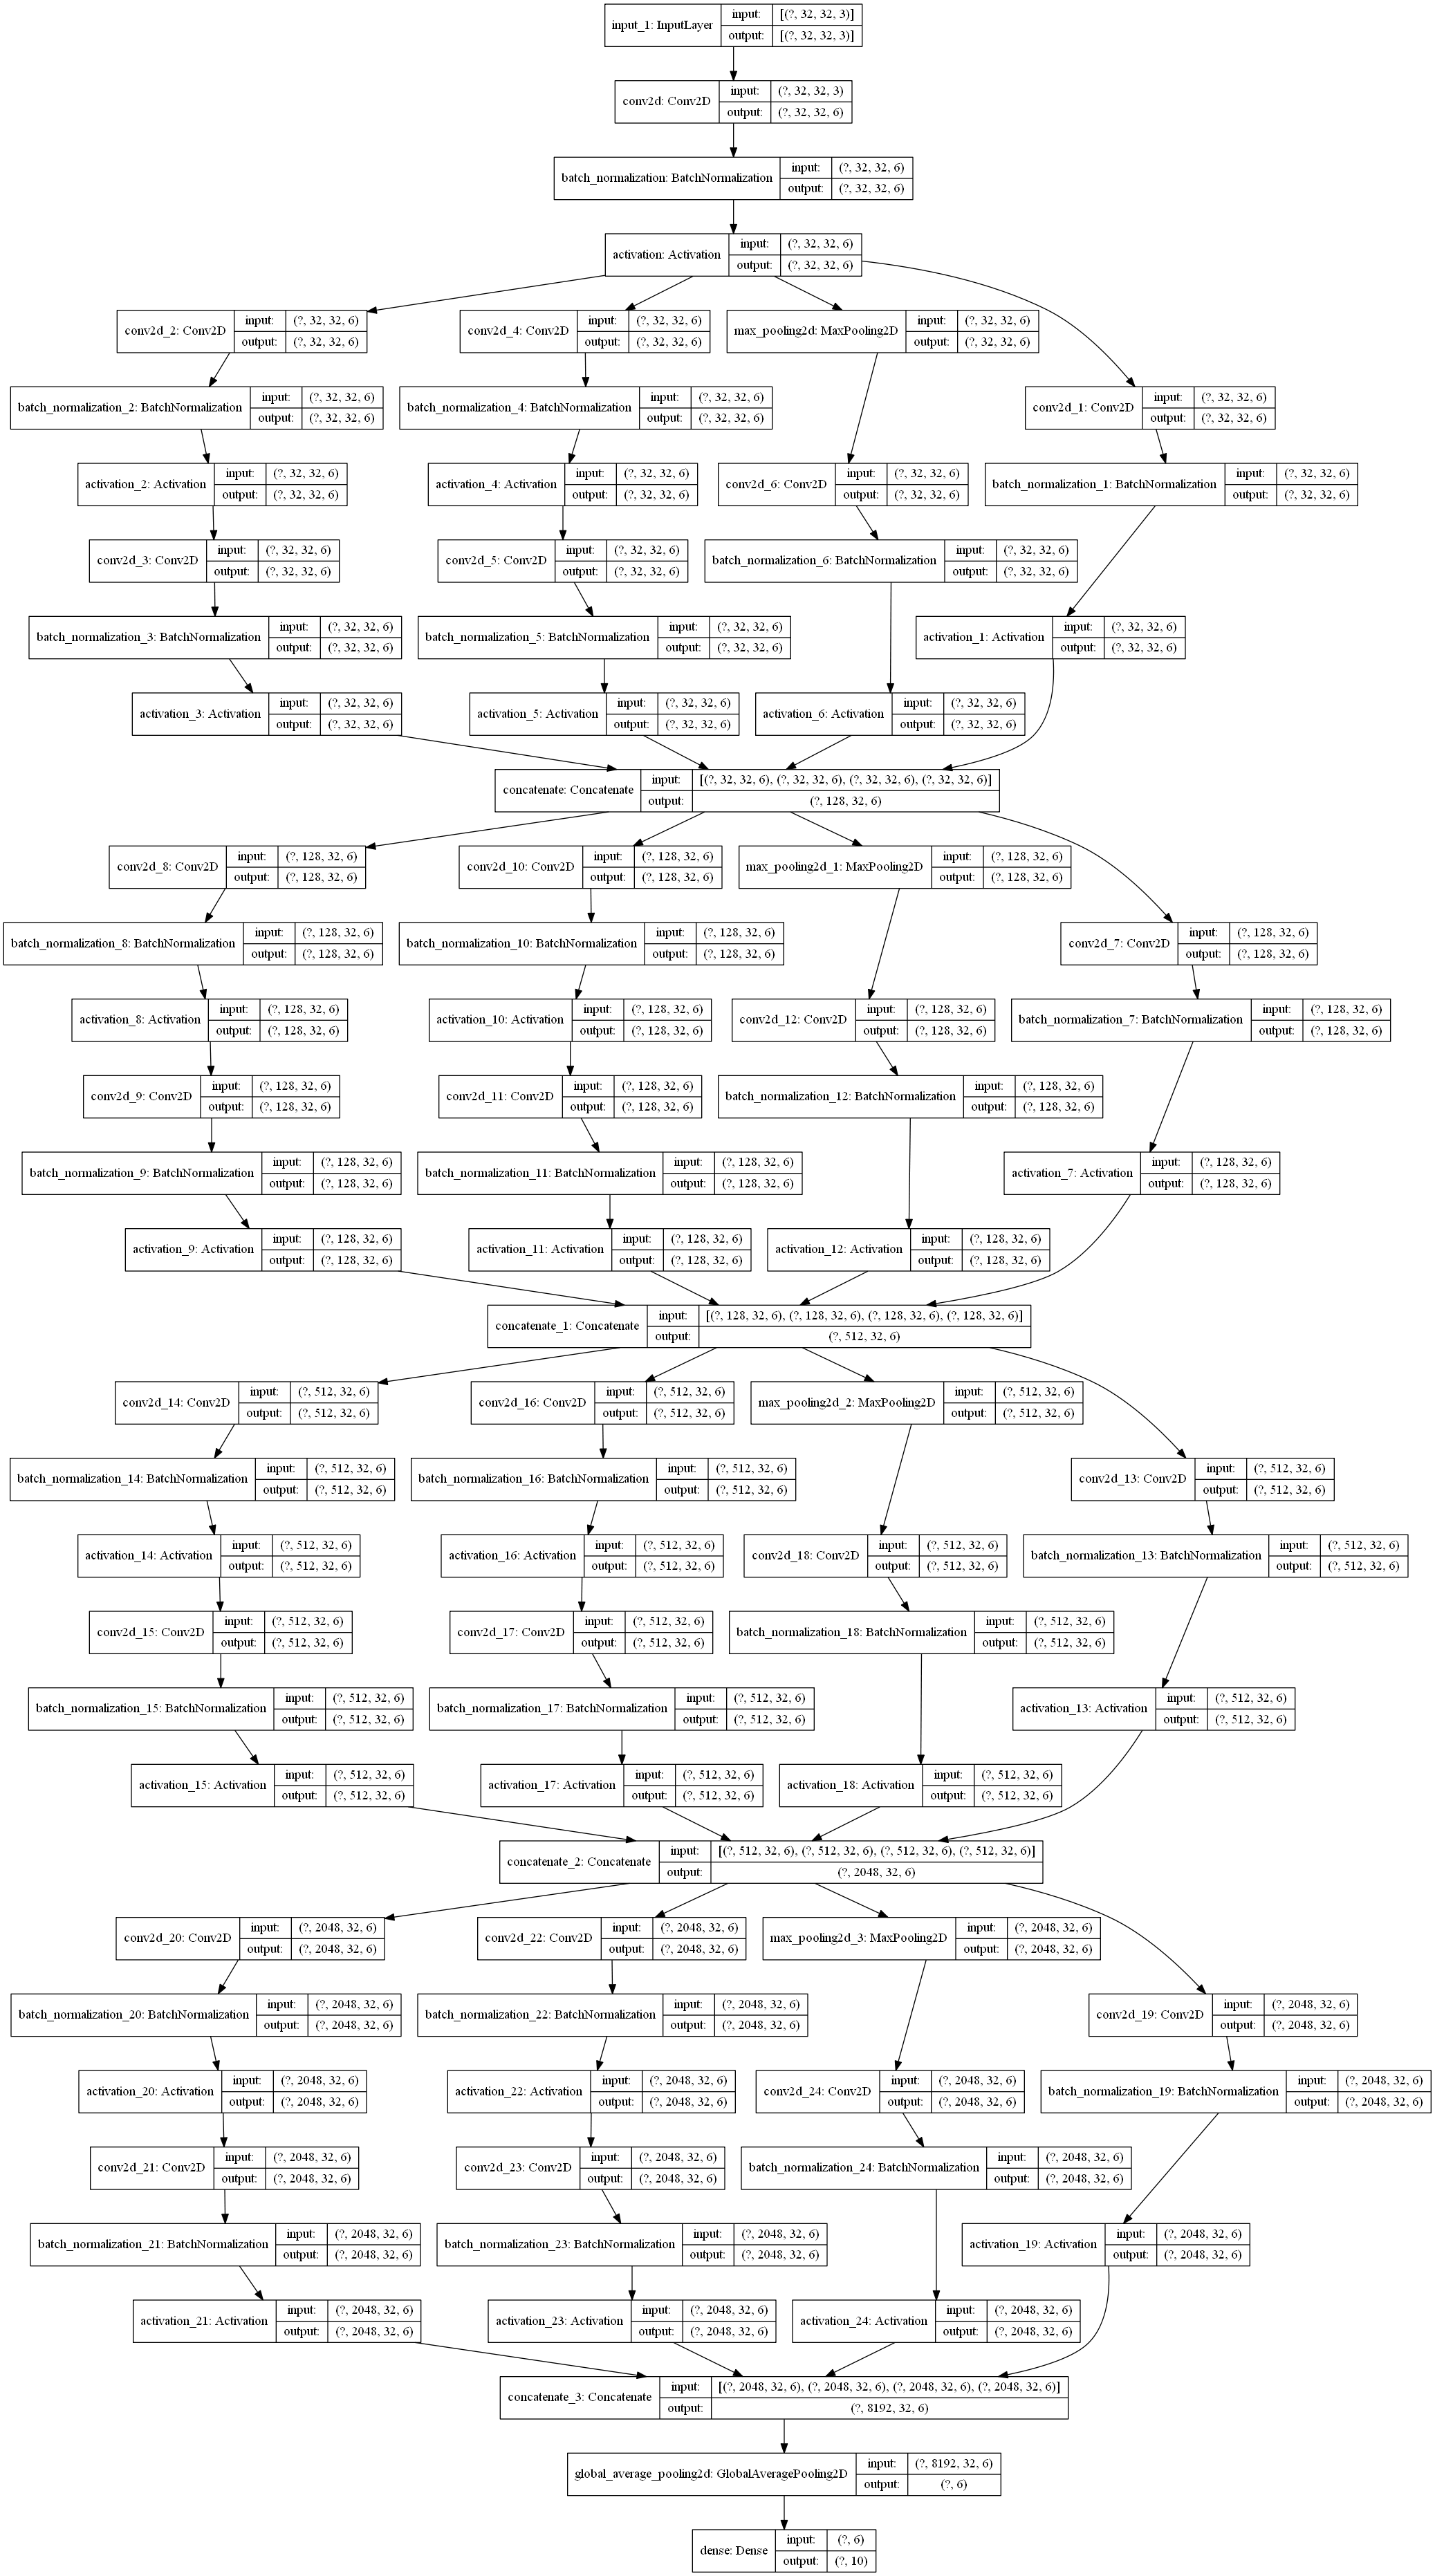

In [14]:
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True)